# **Book Recommendation and EDA**

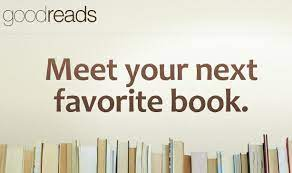

This notebooks contains Explorartory data analysis and Recommendation of books and authors(with a title book). The dataset has been extracted from goodreads and contains following columns:
* BookID
* Title
* Authors
* Average Rating
* isbn 
* isbn13 
* Language Code 
* Number of pages
* Rating count
* text review count 
* Publishing date
* Publisher


In [ ]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv("../input/goodreadsbooks/books.csv", error_bad_lines = False,warn_bad_lines=False)

Some lines were skipped:

Skipping line 3350: expected 12 fields, saw 13 

Skipping line 4704: expected 12 fields, saw 13 

Skipping line 5879: expected 12 fields, saw 13

Skipping line 8981: expected 12 fields, saw 13

## Exploring the dataframe

In [ ]:
df

In [ ]:
print(f"In this dataframe, there are:\n{df.shape[0]} rows,\n{df.shape[1]} columns")

In [ ]:
df.head()

In [ ]:
df.columns


In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.corr()

In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df_cpy=df.copy()

In [ ]:
df_cpy.language_code.unique()

In [ ]:
# Replacing language code with language name for simplicity 
df_cpy.language_code.replace(to_replace=['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por',
       'srp', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur',
       'gla', 'ale'],value=['English','US-English','French','Spanish','British-English','Multiple language','Greek','Middle English','Canada-English',
       'German','japanese','arabic','Dutch','Chinese','Latvian','Portuguese','Serbian','Initial teaching language',
       'russian','Modern Standard Arabic','Galician','Welsh','Swedish','Murik','Turkish','Gaelic','Afro-Asiatic'],inplace=True)

In [ ]:
df_cpy=df_cpy.rename(columns={'language_code':'language'})

In [ ]:
df_cpy.language.unique()

In [ ]:
# Extracting publication year
df_cpy['publication_year'] = df_cpy['publication_date'].apply(lambda x: (int)(str(x[-4:])))

In [ ]:
df_cpy

## Exploratory data analysis

Some informarion about the data.


In [ ]:
avg_rating=round(df_cpy['average_rating'].mean(),2)
avg_num=round(df_cpy['num_pages'].mean(),2)

print(f"The average ratings of the book are:{avg_rating}.\nThe average number of pages are:{avg_num}. ")

In [ ]:
lang=df_cpy['language'].value_counts().idxmax()
pub=df_cpy['publisher'].value_counts()

print(f'\033[1m{lang} \033[0m has most books written in it.\n\033[1m{pub.idxmax()} \033[0m has the most publications.')


In [ ]:
auth =df_cpy['authors'].value_counts()[0:12]
print(auth)

**Authors with most number of books published**

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=auth,y=auth.index)
plt.xticks(rotation=90)
plt.ylabel('authors')
plt.xlabel('No of books')
plt.show()

**publishing house with most number of books published**

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=pub[0:12],y=pub[0:12].index)
plt.xticks(rotation=90)
plt.ylabel('Publishers')
plt.xlabel('No of books')
plt.show()

In [ ]:
print(df_cpy.publication_year.unique())
year=df_cpy['publication_year'].value_counts()[0:12]
print(year)

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=year.index,y=year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No of books')
plt.show()

Year 2006 marks the highest number of books published

In [ ]:
sorted_lang=df_cpy['language'].value_counts()[0:10]

print(sorted_lang)

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=sorted_lang.index,y=sorted_lang)
plt.xticks(rotation=90)
plt.xlabel('languages')
plt.ylabel('Count')
plt.show()

In [ ]:
g=sns.displot(df_cpy,x='average_rating',kind='kde',fill=True);
g.fig.set_figwidth(12)

In [ ]:
df_cpy.groupby('authors')['average_rating'].mean().sort_values(ascending=False).head(20)

In [ ]:
df_cpy.groupby('publisher')['average_rating'].mean().sort_values(ascending=False).head(20)

In [ ]:
print("The number of author in the list are {}".format(df_cpy['authors'].duplicated().sum()))

In [ ]:
print("The number of publishers in the list are {}".format(df_cpy['publisher'].duplicated().sum()))

Books which are most rated

In [ ]:
rating=df_cpy[df_cpy['ratings_count']>1000000]

In [ ]:
rating.head()

In [ ]:
sns.regplot(x=rating["text_reviews_count"], y=rating["ratings_count"])
plt.show()

### Creating a subset with favourite authors


In [ ]:
sub_set=df_cpy[df_cpy['authors'].isin(['J.K. Rowling','Agatha Christie','Dan Brown'])]

In [ ]:
sub_set.head(5)

In [ ]:
sub_set=sub_set.drop(6)

In [ ]:
sub_set.head()

In [ ]:
round(sub_set.groupby('authors')['num_pages'].mean(),2)

In [ ]:
plt.figure(figsize=(16,8))
sub_set.groupby('authors')['publisher'].value_counts().sort_values(ascending=False).plot.bar()
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
sub_set.groupby('authors')['language'].value_counts().sort_values(ascending=False).plot.bar()
plt.show()

For word cloud refered to-: https://www.geeksforgeeks.org/generating-word-cloud-python/

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(author): 
  comment_words = ''
  stopwords = set(STOPWORDS)
  for val in sub_set.title[(sub_set['authors']==author)& (sub_set['language']!='German')]:
      val = str(val)
      tokens = val.split()
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
     
      comment_words += " ".join(tokens)+" "
 
  wordcloud = WordCloud(width = 400, height = 400,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 8).generate(comment_words)
                     
  plt.figure(figsize = (5, 5), facecolor = 'k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
 
  plt.show()

In [ ]:
word_cloud('Agatha Christie')

In [ ]:
word_cloud('Dan Brown')

In [ ]:
word_cloud('J.K. Rowling')

## Recommendation system

### feature engineering 

In [ ]:
df_cpy.loc[ (df_cpy['average_rating'] >= 0) & (df_cpy['average_rating'] <= 1), 'rating_between'] = "0-1"
df_cpy.loc[ (df_cpy['average_rating'] > 1) & (df_cpy['average_rating'] <= 2), 'rating_between'] = "1-2"
df_cpy.loc[ (df_cpy['average_rating'] > 2) & (df_cpy['average_rating'] <= 3), 'rating_between'] = "2-3"
df_cpy.loc[ (df_cpy['average_rating'] > 3) & (df_cpy['average_rating'] <= 4), 'rating_between'] = "3-4"
df_cpy.loc[ (df_cpy['average_rating'] > 4) & (df_cpy['average_rating'] <= 5), 'rating_between'] = "4-5"

In [ ]:
df_cpy.head()


In [ ]:
rating_df = pd.get_dummies(df_cpy['rating_between'])
rating_df.head(10)

In [ ]:
language_df = pd.get_dummies(df_cpy['language'])
language_df.head()

In [ ]:
features = pd.concat([rating_df, language_df, df_cpy['average_rating'], df_cpy['ratings_count']], axis=1)
features.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

In [ ]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=8, algorithm='auto')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [ ]:
def Recommender(name):
    book_list = []
    book_id = df_cpy[df_cpy['title'] == name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list.append(df_cpy.loc[newid].title)
    print("Recommended books are:")
    for i in range(0,len(book_list)):
      print(f"{i+1}){book_list[i]}")

**PREDICTIONS**

In [ ]:
Recommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')

In [ ]:
Recommender("At Bertram's Hotel")

In [ ]:
def author_Recommender(author):
    auth_list = []
    books=[]
    auth_id = df_cpy[df_cpy['authors'] == author].index
    auth_id = auth_id[0]
    for newid in idlist[auth_id]:
        auth_list.append(df_cpy.loc[newid].authors)
        books.append(df_cpy.loc[newid].title)
    for i in range(0,len(auth_list)):
      print(f"{i+1})Author:{auth_list[i]},\nrecommended book:{books[i]}")

**PRECIDTIONS**

In [ ]:
author_Recommender('Stephen King')

In [ ]:
author_Recommender('Agatha Christie')

In [ ]:
author_Recommender('Dan Brown')